# Plotting Bivariate and Multivariate Data

There are numerous strategies to visualize how pairs of continuous random variables vary jointly. Regression and residual plots are one strategy. Another is to visualize a bivariate distribution.

### Seaborn Jointplot

Seaborn's `sns.jointplot()` provides means of visualizing bivariate distributions. The basic calling syntax is similar to that of `sns.lmplot()`. By default, calling `sns.jointplot(x, y, data)` renders a few things:

* A scatter plot using the specified columns x and y from the DataFrame data.

* A (univariate) histogram along the top of the scatter plot showing distribution of the column x.

* A (univariate) histogram along the right of the scatter plot showing distribution of the column y.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

auto = pd.read_csv('./data/auto.csv')

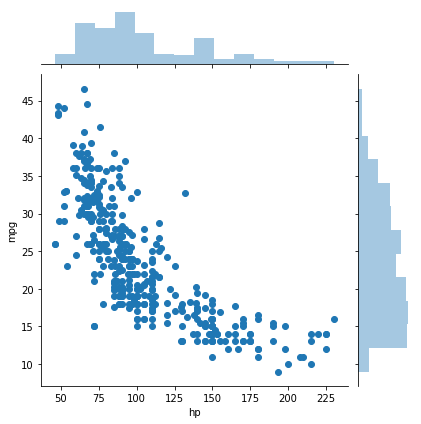

In [2]:
# visualize the joint variation of the columns 'hp' (on the x-axis) and 
# 'mpg' (on the y-axis) from the DataFrame auto.
sns.jointplot(x='hp', y='mpg', data=auto)

# Display the plot
plt.show()

`sns.jointplot()` has a parameter `kind` to specify how to visualize the joint variation of two continuous random variables (i.e., two columns of a DataFrame)

* `kind='scatter'` uses a scatter plot of the data points (default)


* `kind='reg'` uses a regression plot (default order 1)


* `kind='resid'` uses a residual plot


* `kind='kde'` uses a kernel density estimate of the joint distribution


* `kind='hex'` uses a hexbin plot of the joint distribution

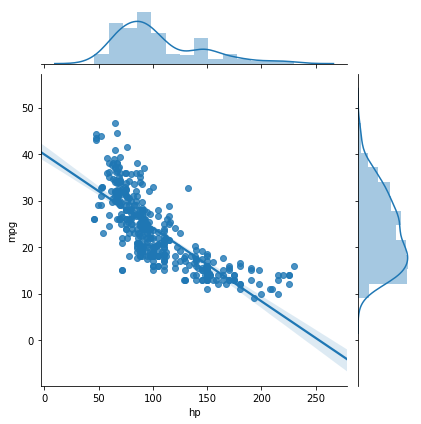

In [6]:
# Generate a joint plot of 'hp' and 'mpg' using a reg plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='reg')

# Display the plot
plt.show()

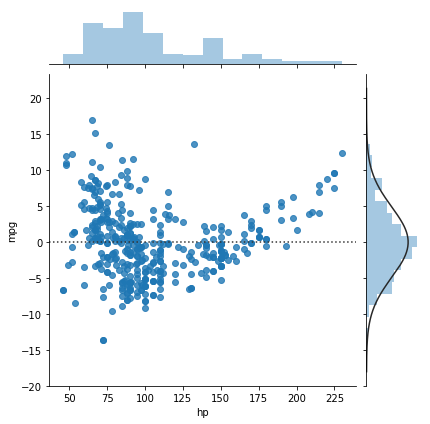

In [8]:
# Generate a joint plot of 'hp' and 'mpg' using a resid plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='resid')

# Display the plot
plt.show()

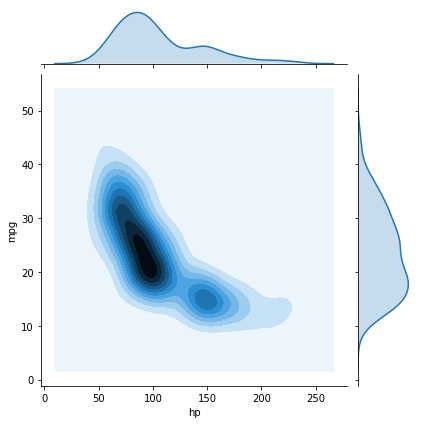

In [9]:
# Generate a joint plot of 'hp' and 'mpg' using a kde plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='kde')

# Display the plot
plt.show()

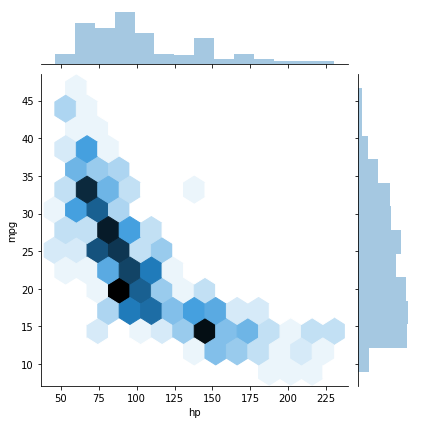

In [4]:
# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp', y='mpg', data=auto, kind='hex')

# Display the plot
plt.show()


### Seaborn Pairplot

Data sets often contain more than two continuous variables. The function `sns.jointplot()` is restricted to representing joint variation between only two quantities (i.e., two columns of a DataFrame). Visualizing multivariate relationships is trickier.

The function `sns.pairplot()` constructs a grid of all joint plots pairwise from all pairs of (non-categorical) columns in a DataFrame. The syntax is very simple: `sns.pairplot(df`), where df is a DataFrame. The non-categorical columns are identified and the corresponding joint plots are plotted in a square grid of subplots. The diagonal of the subplot grid shows the univariate histograms of the individual columns.

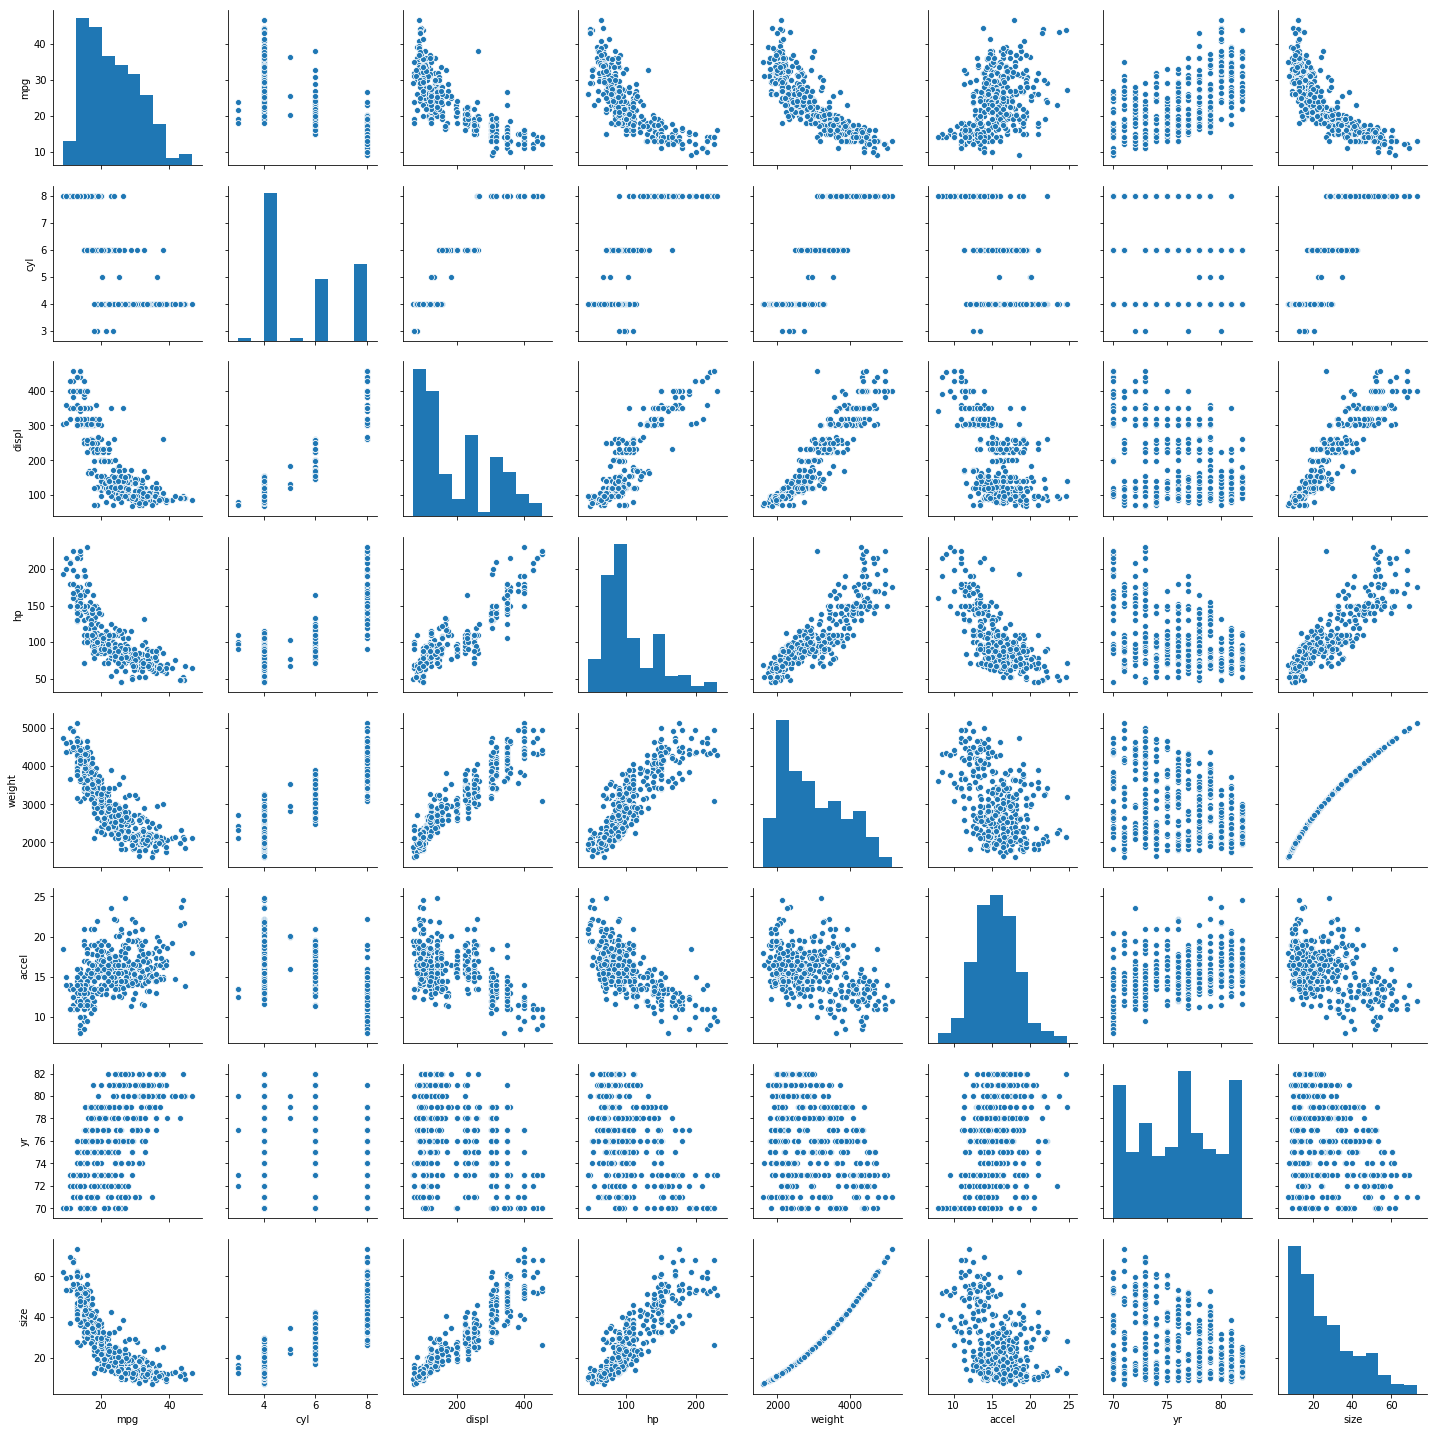

In [10]:
sns.pairplot(auto);

We can display regressions as well as scatter plots in the off-diagonal subplots. We can do this with the argument `kind='reg'` (where 'reg' means 'regression'). Another option for kind is 'scatter' (the default) that plots scatter plots in the off-diagonal subplots.

We can also visualize the joint distributions separated by continent of origin. You will do this with the keyword argument hue specifying the 'origin'.

In [12]:
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


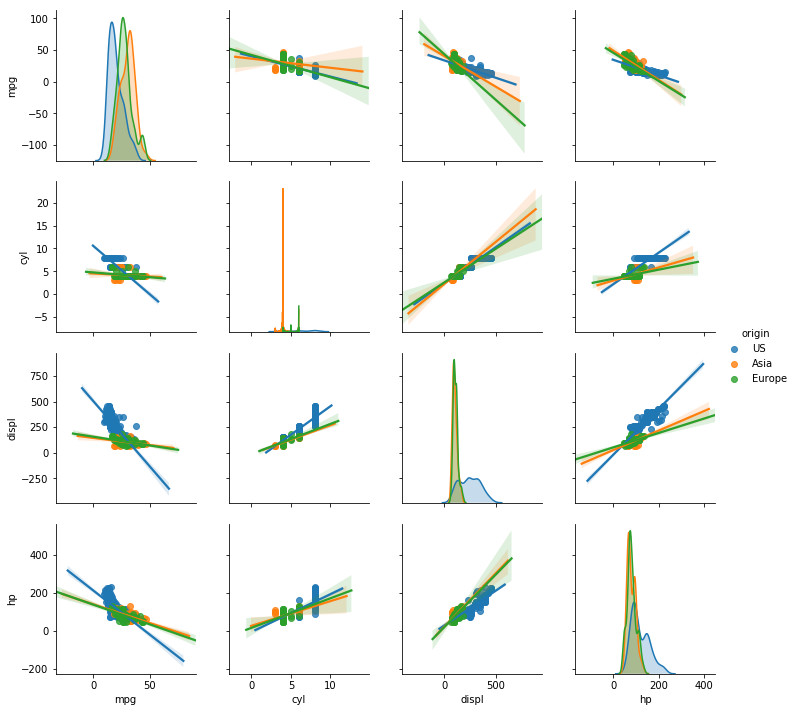

In [15]:
sns.pairplot(data=auto[['mpg', 'cyl', 'displ', 'hp', 'origin']], kind='reg', hue='origin')

plt.show();

### Seaborn Heatmap

Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

We can calculate the covariance-matrix (correlation-matrix) by calling `.corr()` on the dataframe. Its diagonal entries are all 1s, and the off-diagonal entries are between -1 and +1 (quantifying the degree to which variable pairs vary jointly). It is also, then, a symmetric matrix.

In [17]:
cov_matrix = auto.corr(); cov_matrix

,mpg,cyl,displ,hp,weight,accel,yr,size
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,-0.806682
cyl,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,0.890839
displ,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,0.928779
hp,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,0.869720
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,0.992019
accel,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,-0.426547
yr,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,-0.325214
size,-0.806682,0.890839,0.928779,0.869720,0.992019,-0.426547,-0.325214,1.000000


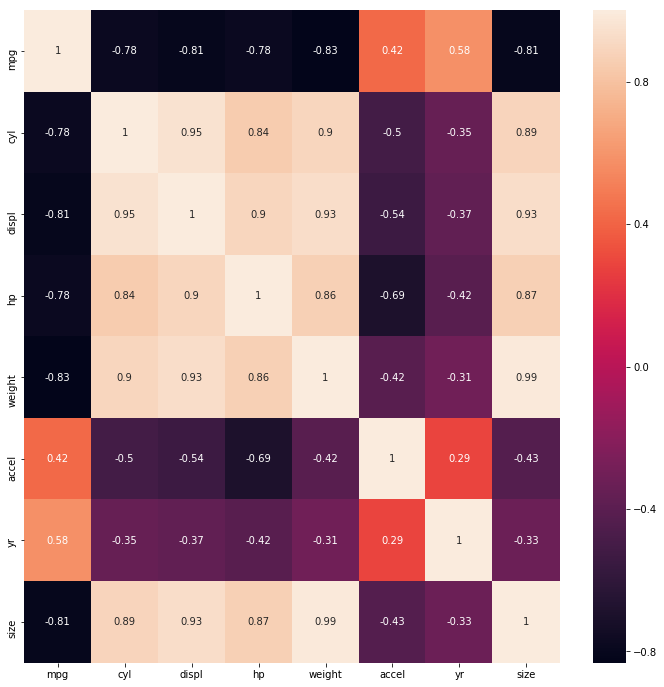

In [20]:
# Visualize the covariance matrix using a heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cov_matrix, annot=True)

# Display the heatmap
plt.show()